In [1306]:
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold, RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

In [1307]:
plt.style.use('dark_background')

In [1308]:
df = pd.read_csv("winequality-red.csv", sep=";")


In [1309]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [1310]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [1311]:
df['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

<Axes: xlabel='quality', ylabel='alcohol'>

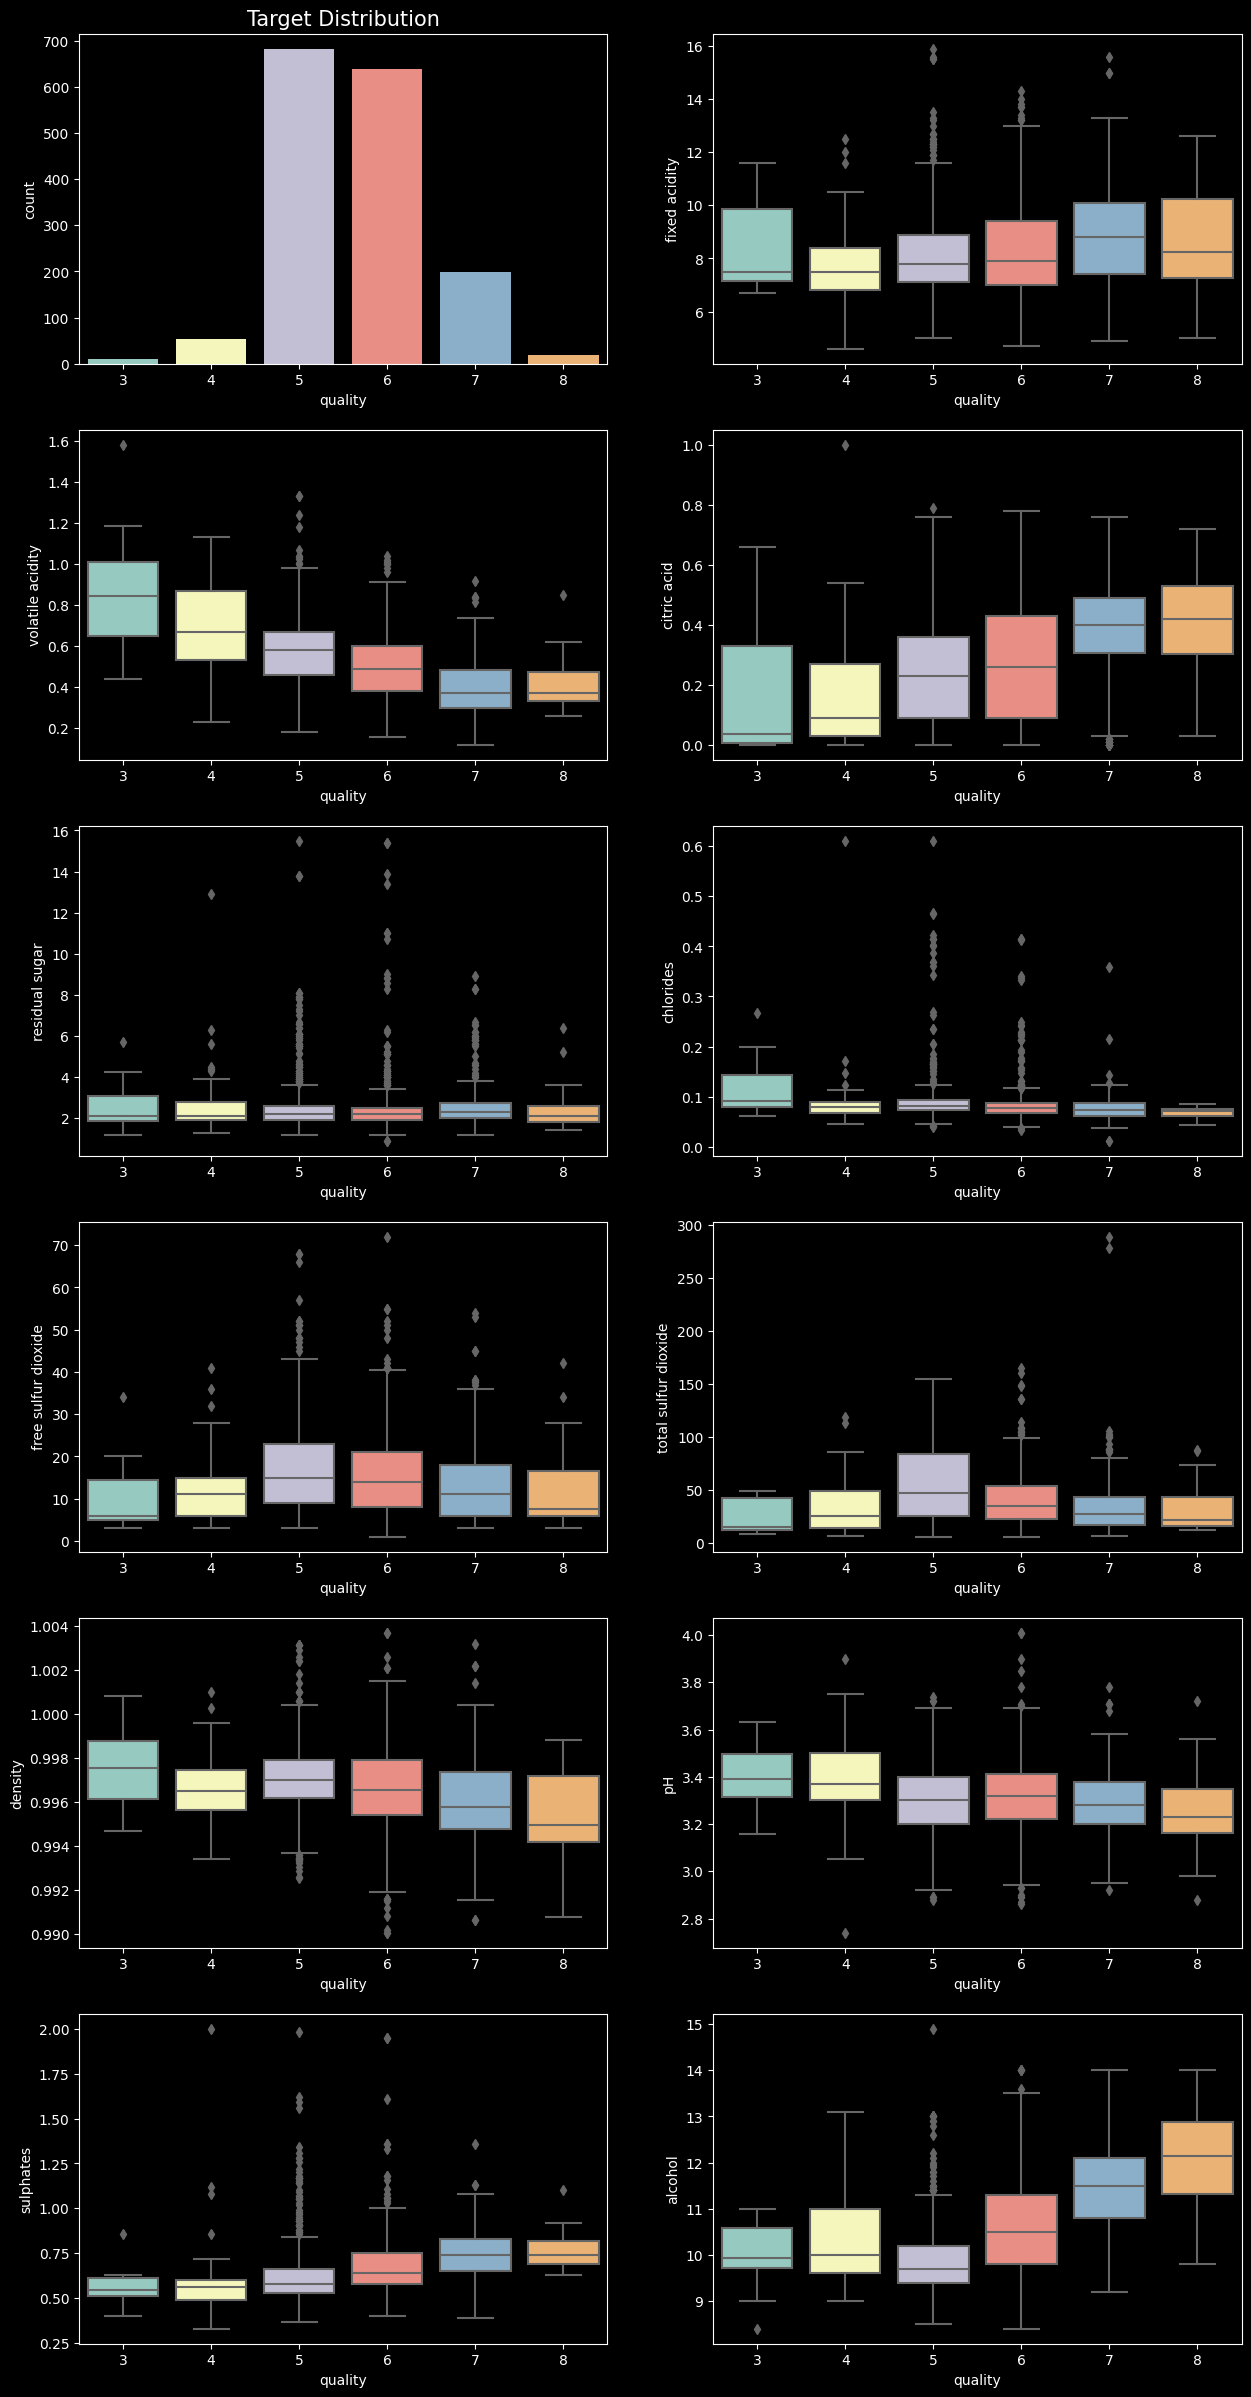

In [1312]:
#Realizar boxblot para ver los outliers
fig,ax=plt.subplots(6,2,figsize=(15,30))
sns.countplot(x=df.quality,ax=ax[0][0]).set_title('Target Distribution',size=15)
sns.boxplot(x=df.quality,y=df['fixed acidity'],ax=ax[0][1])
sns.boxplot(x=df.quality,y=df['volatile acidity'],ax=ax[1][0])
sns.boxplot(x=df.quality,y=df['citric acid'],ax=ax[1][1])
sns.boxplot(x=df.quality,y=df['residual sugar'],ax=ax[2][0])
sns.boxplot(x=df.quality,y=df['chlorides'],ax=ax[2][1])
sns.boxplot(x=df.quality,y=df['free sulfur dioxide'],ax=ax[3][0])
sns.boxplot(x=df.quality,y=df['total sulfur dioxide'],ax=ax[3][1])
sns.boxplot(x=df.quality,y=df['density'],ax=ax[4][0])
sns.boxplot(x=df.quality,y=df['pH'],ax=ax[4][1])
sns.boxplot(x=df.quality,y=df['sulphates'],ax=ax[5][0])
sns.boxplot(x=df.quality,y=df['alcohol'],ax=ax[5][1])

Text(0.5, 1.0, 'quality')

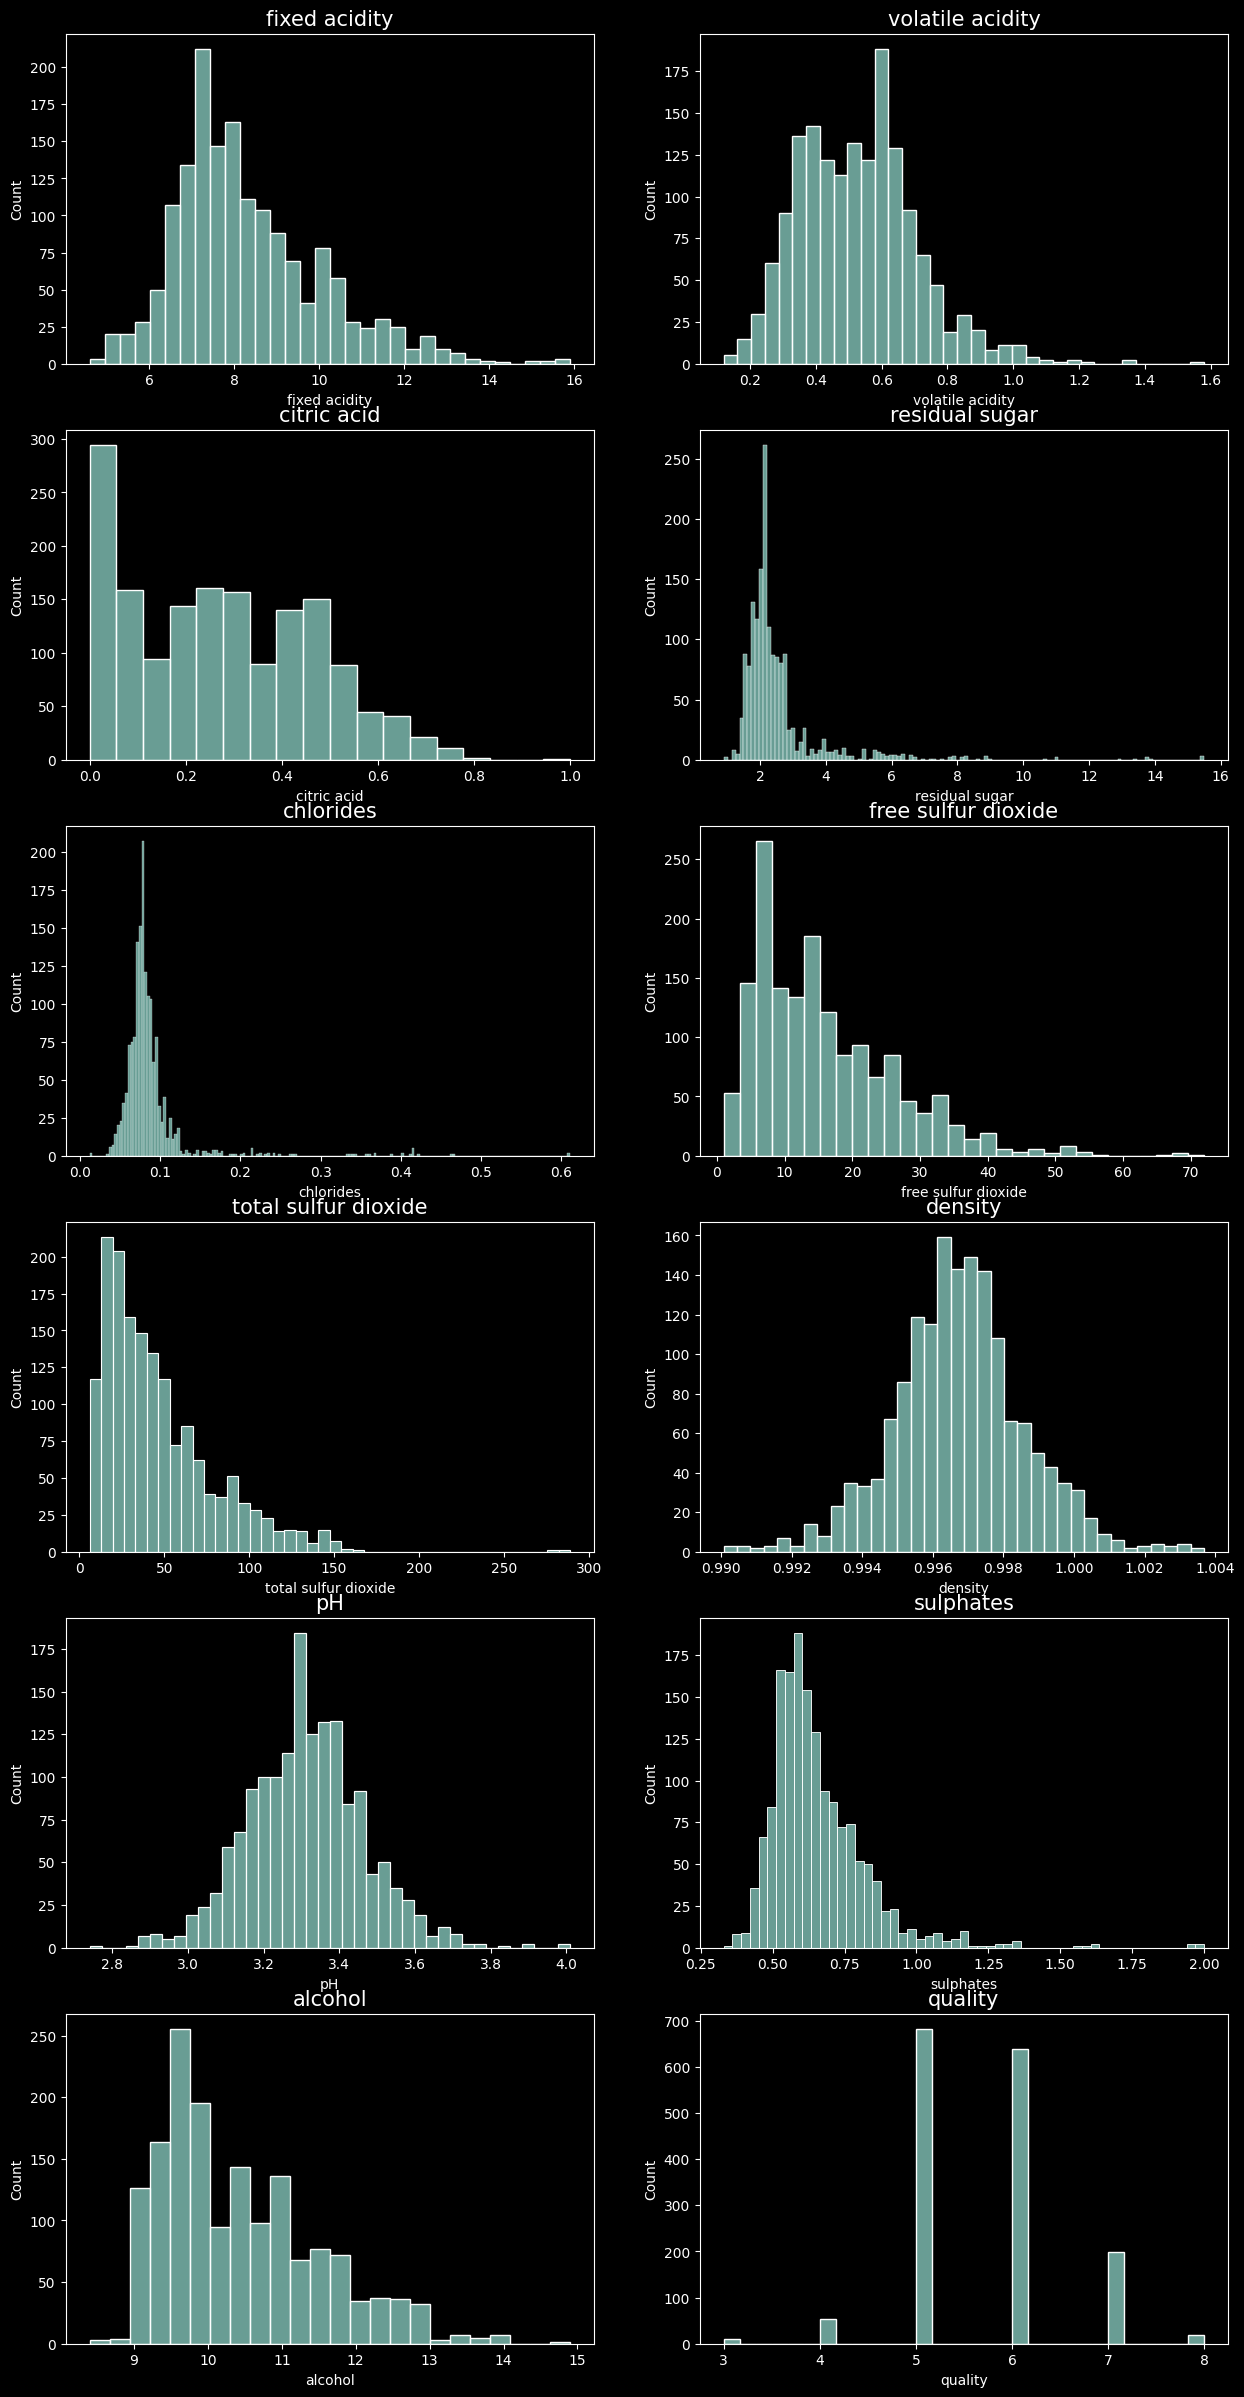

In [1313]:
#Crear histogramas para ver la distribucion de los datos
fig,ax=plt.subplots(6,2,figsize=(15,30))
sns.histplot(x=df['fixed acidity'],ax=ax[0][0]).set_title('fixed acidity',size=15)
sns.histplot(x=df['volatile acidity'],ax=ax[0][1]).set_title('volatile acidity',size=15)
sns.histplot(x=df['citric acid'],ax=ax[1][0]).set_title('citric acid',size=15)
sns.histplot(x=df['residual sugar'],ax=ax[1][1]).set_title('residual sugar',size=15)
sns.histplot(x=df['chlorides'],ax=ax[2][0]).set_title('chlorides',size=15)
sns.histplot(x=df['free sulfur dioxide'],ax=ax[2][1]).set_title('free sulfur dioxide',size=15)
sns.histplot(x=df['total sulfur dioxide'],ax=ax[3][0]).set_title('total sulfur dioxide',size=15)
sns.histplot(x=df['density'],ax=ax[3][1]).set_title('density',size=15)
sns.histplot(x=df['pH'],ax=ax[4][0]).set_title('pH',size=15)
sns.histplot(x=df['sulphates'],ax=ax[4][1]).set_title('sulphates',size=15)
sns.histplot(x=df['alcohol'],ax=ax[5][0]).set_title('alcohol',size=15)
sns.histplot(x=df['quality'],ax=ax[5][1]).set_title('quality',size=15)


Text(0.5, 1.0, 'quality')

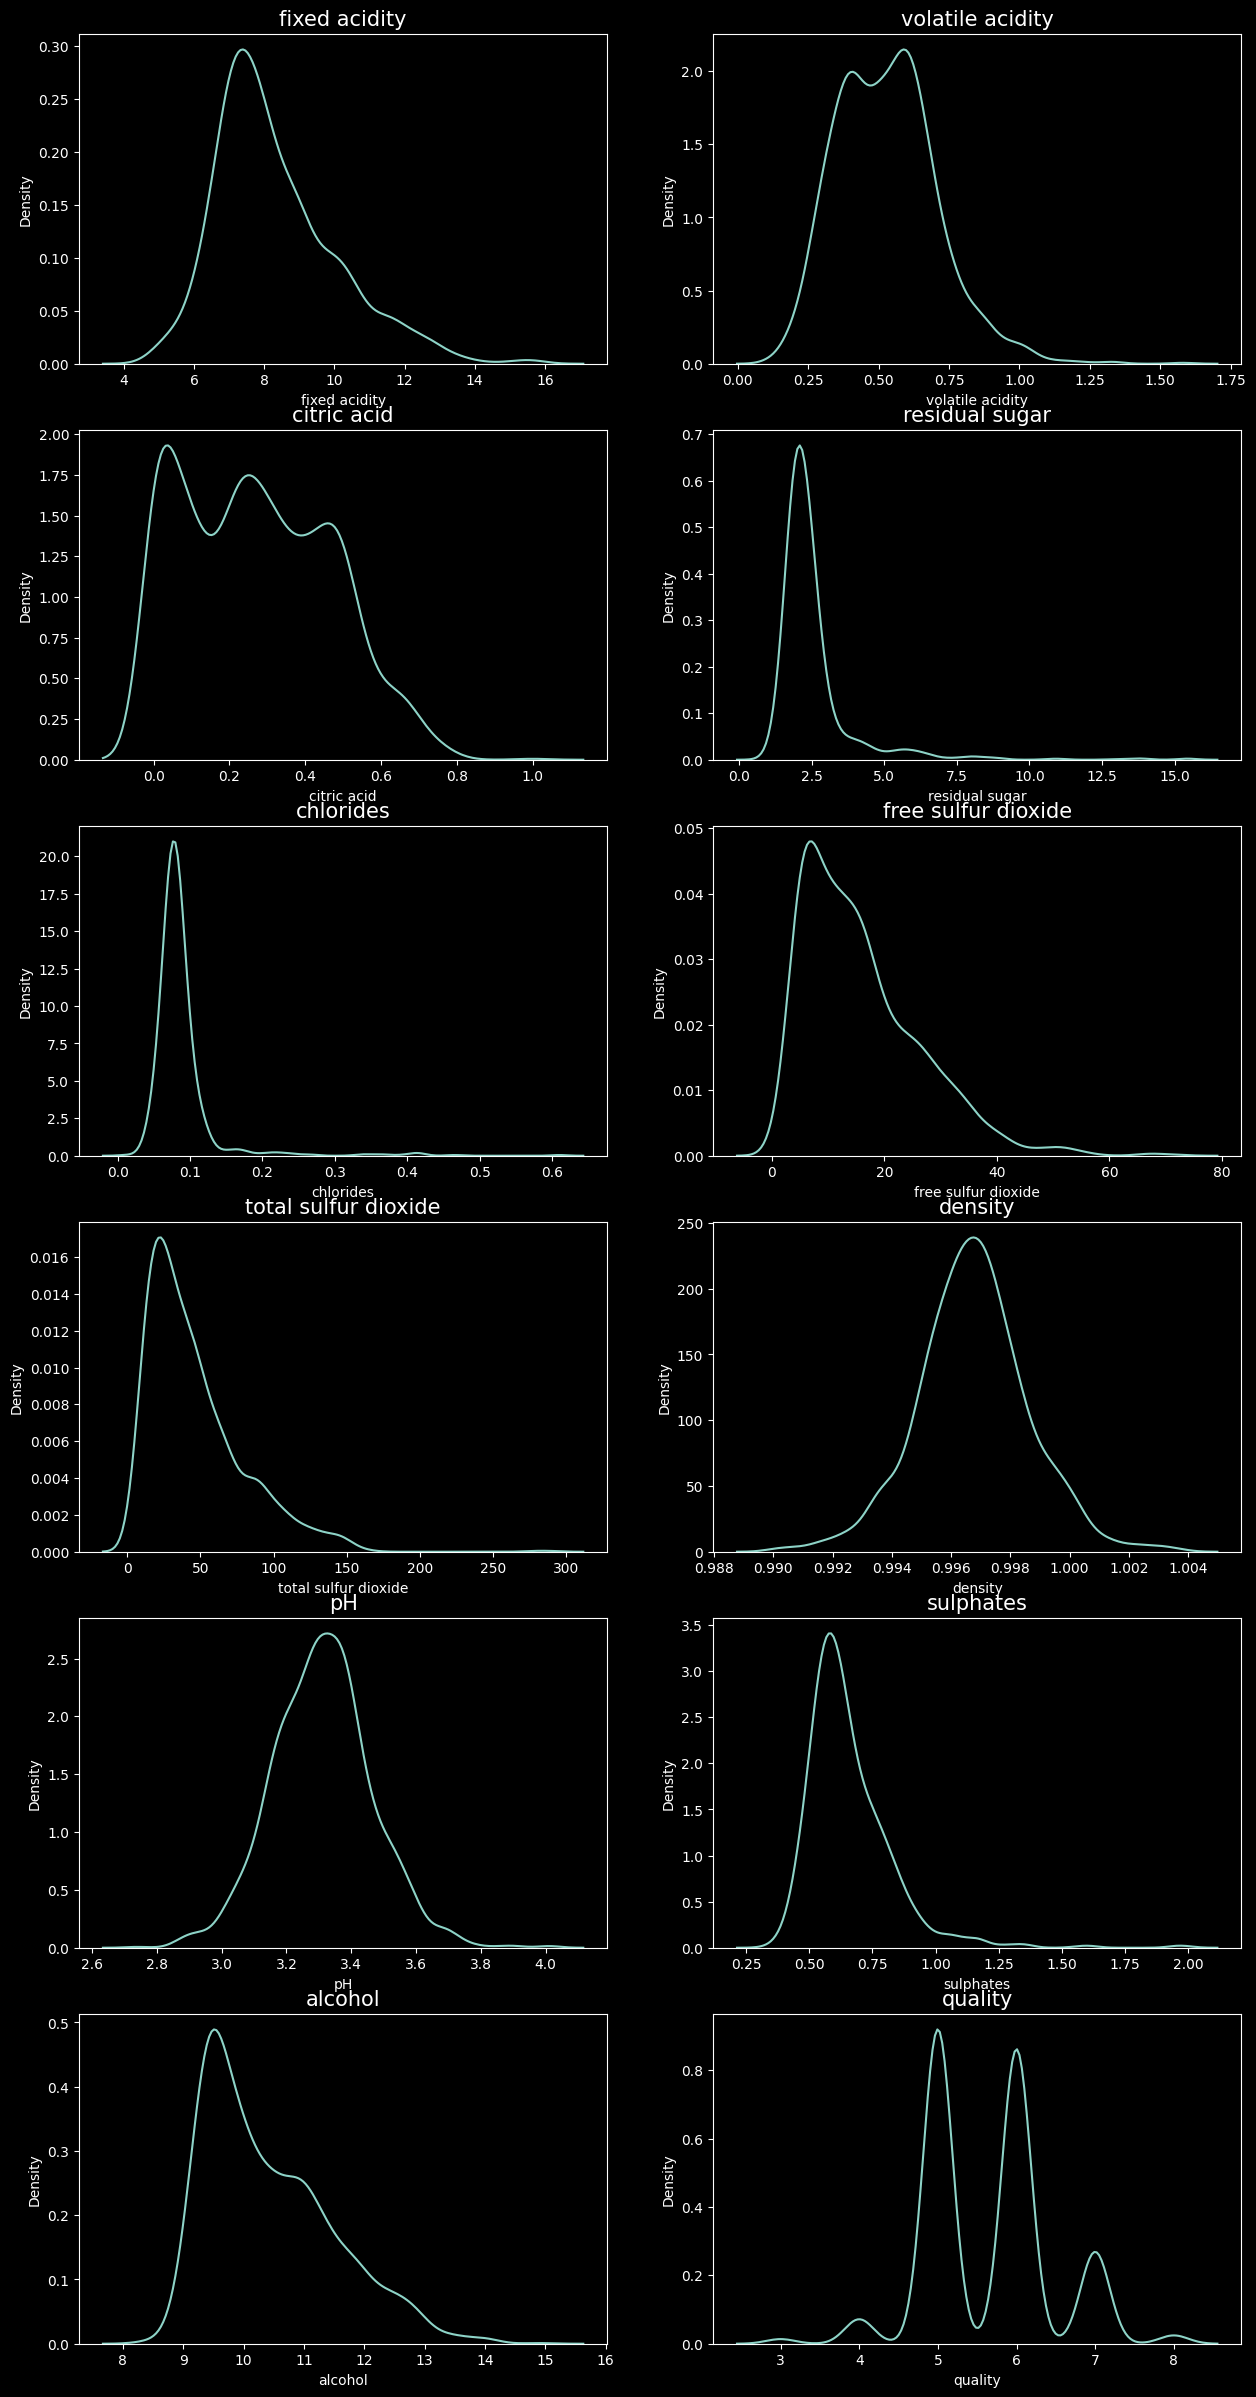

In [1314]:
#Graficar la kurtosis y asimetria para cada variable
fig,ax=plt.subplots(6,2,figsize=(15,30))
sns.kdeplot(x=df['fixed acidity'],ax=ax[0][0]).set_title('fixed acidity',size=15)
sns.kdeplot(x=df['volatile acidity'],ax=ax[0][1]).set_title('volatile acidity',size=15)
sns.kdeplot(x=df['citric acid'],ax=ax[1][0]).set_title('citric acid',size=15)
sns.kdeplot(x=df['residual sugar'],ax=ax[1][1]).set_title('residual sugar',size=15)
sns.kdeplot(x=df['chlorides'],ax=ax[2][0]).set_title('chlorides',size=15)
sns.kdeplot(x=df['free sulfur dioxide'],ax=ax[2][1]).set_title('free sulfur dioxide',size=15)
sns.kdeplot(x=df['total sulfur dioxide'],ax=ax[3][0]).set_title('total sulfur dioxide',size=15)
sns.kdeplot(x=df['density'],ax=ax[3][1]).set_title('density',size=15)
sns.kdeplot(x=df['pH'],ax=ax[4][0]).set_title('pH',size=15)
sns.kdeplot(x=df['sulphates'],ax=ax[4][1]).set_title('sulphates',size=15)
sns.kdeplot(x=df['alcohol'],ax=ax[5][0]).set_title('alcohol',size=15)
sns.kdeplot(x=df['quality'],ax=ax[5][1]).set_title('quality',size=15)


Text(0.5, 1.0, 'Target Distribution')

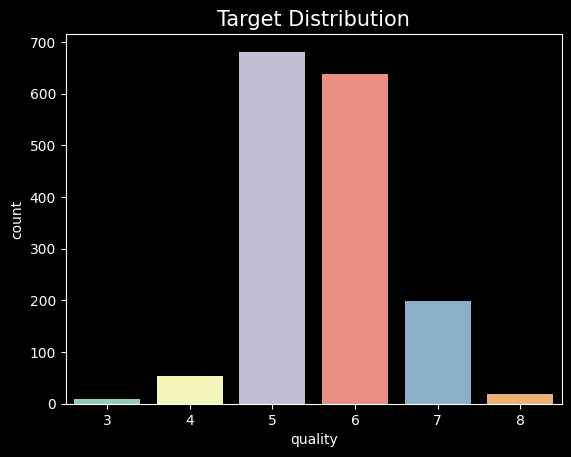

In [1315]:
#Graficar la distribucion de quality
sns.countplot(x=df.quality).set_title('Target Distribution',size=15)

In [1316]:
#asimetria
asimetria = df.skew().sort_values()
asimetria

density                 0.071288
pH                      0.193683
quality                 0.217802
citric acid             0.318337
volatile acidity        0.671593
alcohol                 0.860829
fixed acidity           0.982751
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
sulphates               2.428672
residual sugar          4.540655
chlorides               5.680347
dtype: float64

In [1317]:
#kurtosis
kurtosis = df.kurtosis().sort_values()
kurtosis

citric acid             -0.788998
alcohol                  0.200029
quality                  0.296708
pH                       0.806943
density                  0.934079
fixed acidity            1.132143
volatile acidity         1.225542
free sulfur dioxide      2.023562
total sulfur dioxide     3.809824
sulphates               11.720251
residual sugar          28.617595
chlorides               41.715787
dtype: float64

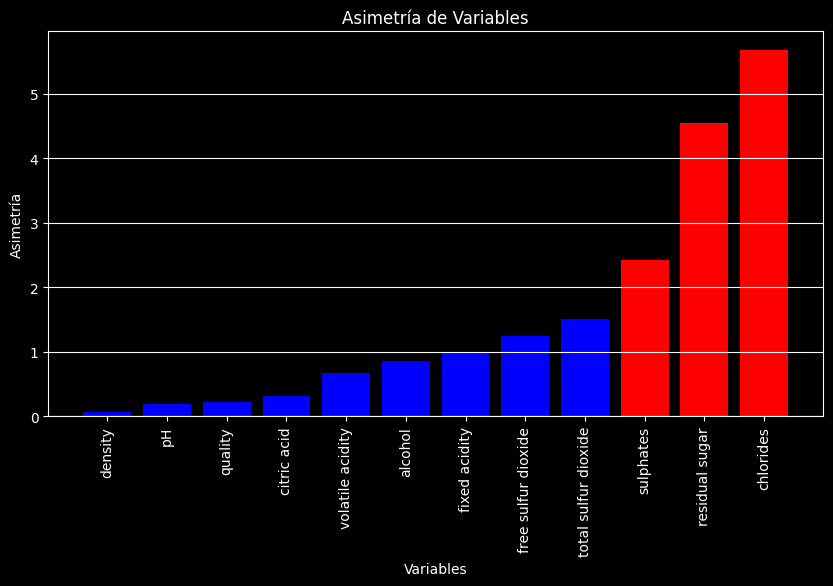

In [1318]:
colores = ['blue' if valor <= 2 else 'red' for valor in asimetria]

plt.figure(figsize=(10, 5))
plt.bar(asimetria.index, asimetria, color=colores)
plt.title('Asimetría de Variables')
plt.xlabel('Variables')
plt.ylabel('Asimetría')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

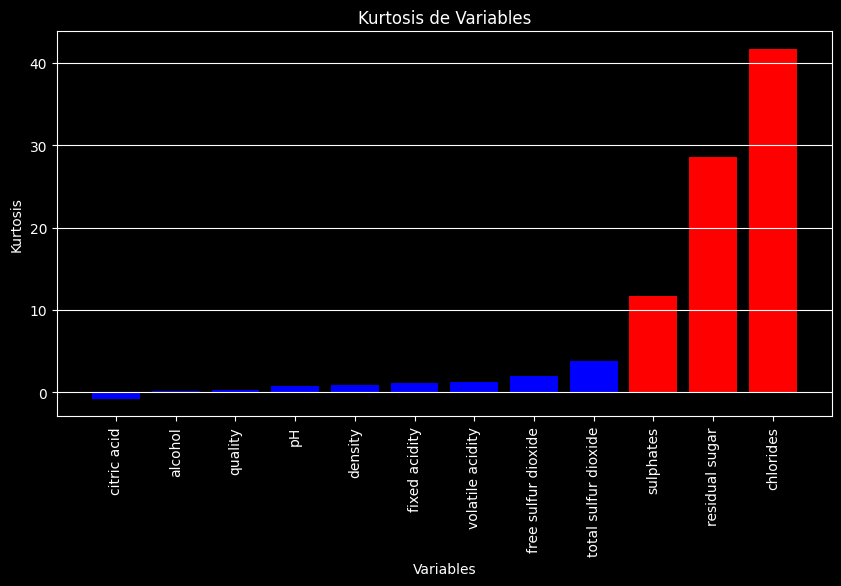

In [1319]:
colores = ['blue' if valor <= 10 else 'red' for valor in kurtosis]

plt.figure(figsize=(10, 5))
plt.bar(kurtosis.index, kurtosis, color=colores)
plt.title('Kurtosis de Variables')
plt.xlabel('Variables')
plt.ylabel('Kurtosis')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

Ya que las variables [sulphates, residual sugar, chlorides] tienen una asimetria y kurtosis alta, se procede a normalizar los datos

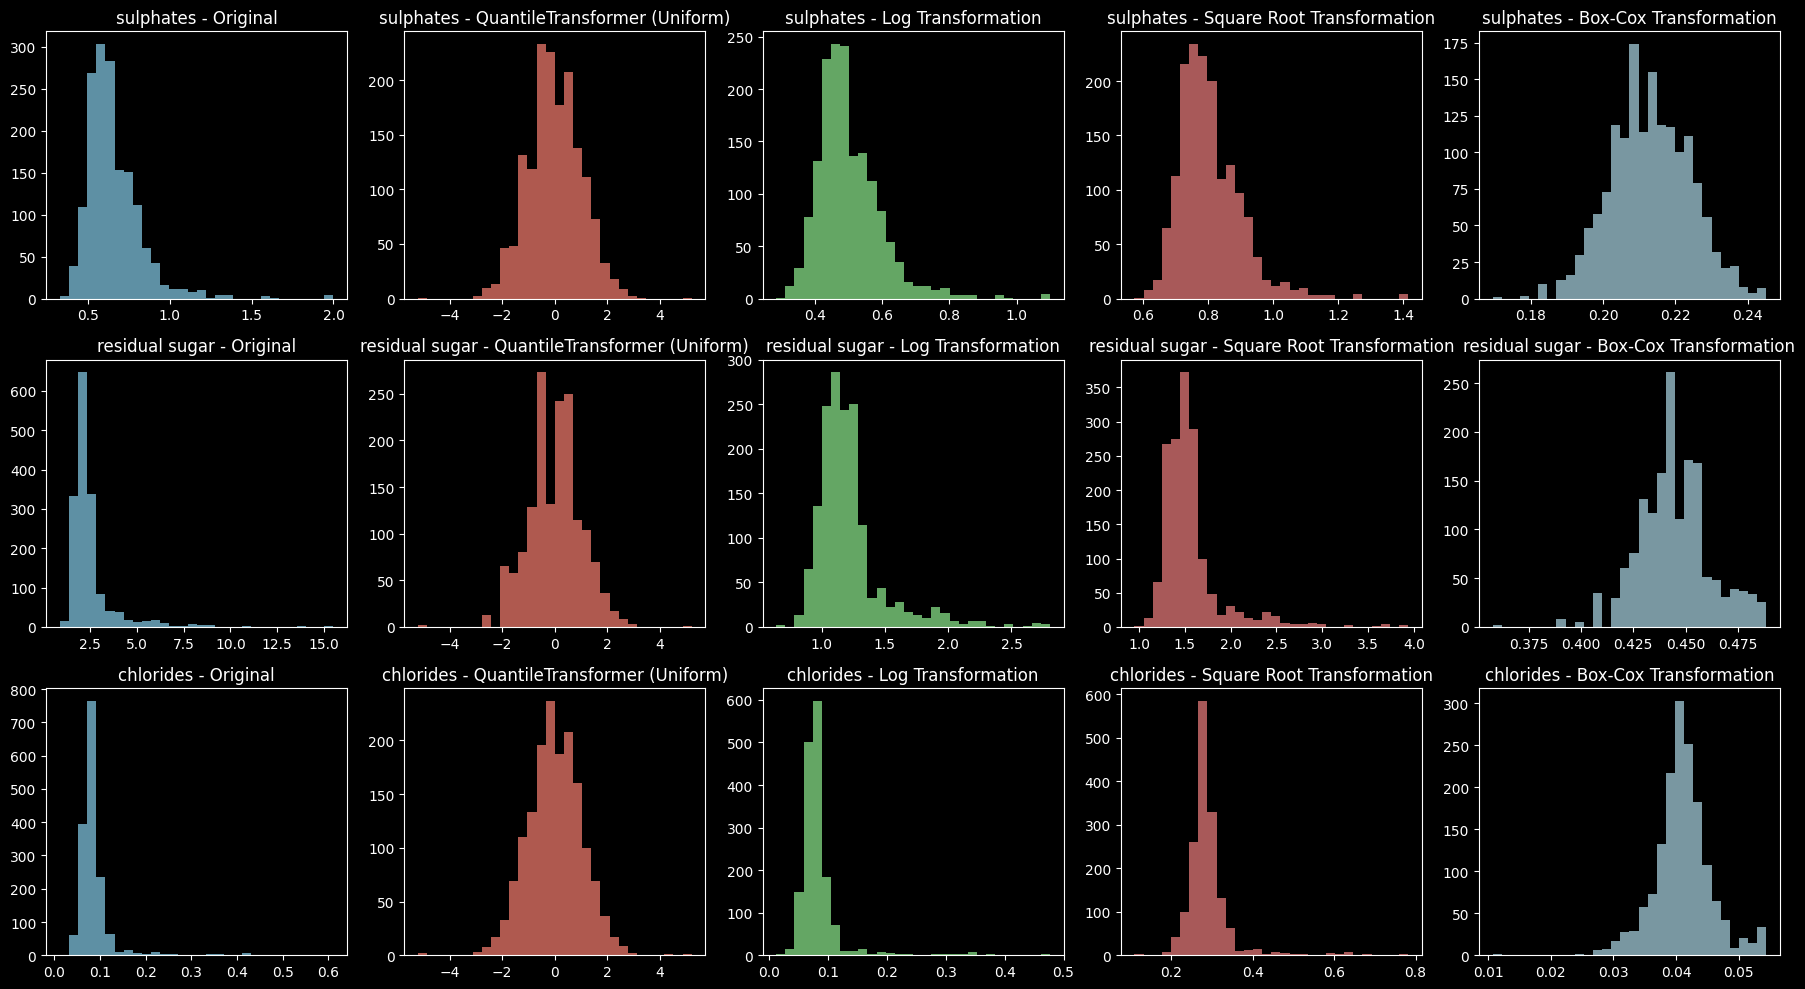

In [1320]:
from scipy import stats
from sklearn.preprocessing import QuantileTransformer

# Supongamos que 'data' es tu DataFrame y las variables son 'sulphates', 'residual sugar', 'chlorides'
variables = ['sulphates', 'residual sugar', 'chlorides']

# Crea una figura con subgráficos para cada variable y sus transformaciones
fig, axs = plt.subplots(len(variables), 5, figsize=(18, 10))

for i, var in enumerate(variables):
    # Datos originales
    data_original = df[var]
    axs[i, 0].hist(data_original, bins=30, color='skyblue', alpha=0.7)
    axs[i, 0].set_title(f'{var} - Original')

    # QuantileTransformer
    transformer = QuantileTransformer(output_distribution='normal')
    data_transformed = transformer.fit_transform(data_original.values.reshape(-1, 1)).flatten()
    axs[i, 1].hist(data_transformed, bins=30, color='salmon', alpha=0.7)
    axs[i, 1].set_title(f'{var} - QuantileTransformer (Uniform)')

    # Log transformation
    data_log = np.log(data_original + 1)  # Agregamos 1 para evitar log(0)
    axs[i, 2].hist(data_log, bins=30, color='lightgreen', alpha=0.7)
    axs[i, 2].set_title(f'{var} - Log Transformation')

    # Square root transformation
    data_sqrt = np.sqrt(data_original)
    axs[i, 3].hist(data_sqrt, bins=30, color='lightcoral', alpha=0.7)
    axs[i, 3].set_title(f'{var} - Square Root Transformation')

    # Box-Cox transformation
    data_boxcox, _ = stats.boxcox(data_original + 1)  # Agregamos 1 para evitar valores no positivos
    axs[i, 4].hist(data_boxcox, bins=30, color='lightblue', alpha=0.7)
    axs[i, 4].set_title(f'{var} - Box-Cox Transformation')

plt.tight_layout()
plt.show()

In [1321]:
variables = ['chlorides', 'residual sugar', 'sulphates']
transformer = QuantileTransformer(output_distribution='uniform')
df[variables] = transformer.fit_transform(df[variables])



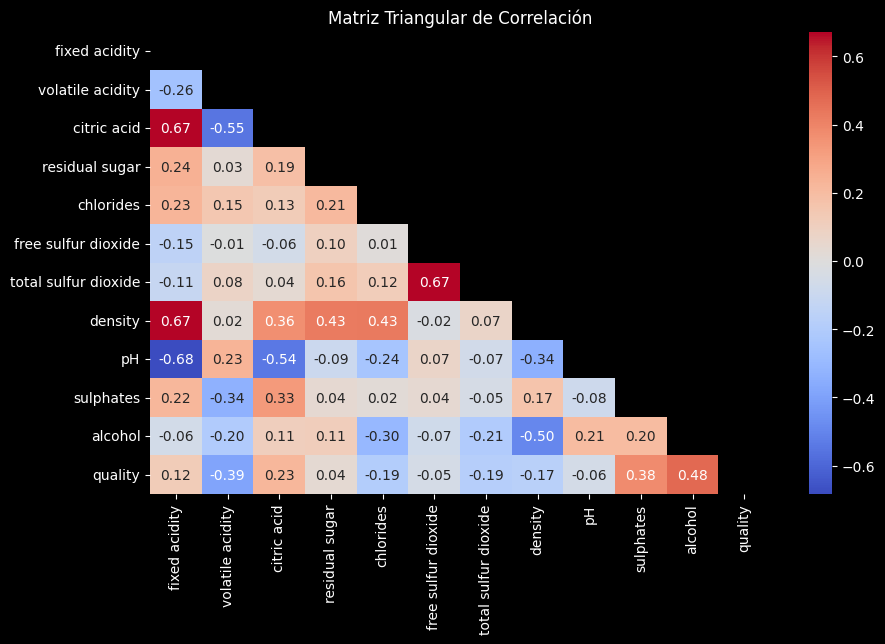

In [1322]:
correlation_matrix = df.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', mask=mask)
plt.title('Matriz Triangular de Correlación')
plt.show()

In [1323]:
X = df.drop(['quality'], axis=1)
y = df['quality']

smote = SMOTE(random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

#Oversampling y datos de testeo y entrenamiento con SMOTE
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

Text(0.5, 1.0, 'Target Distribution')

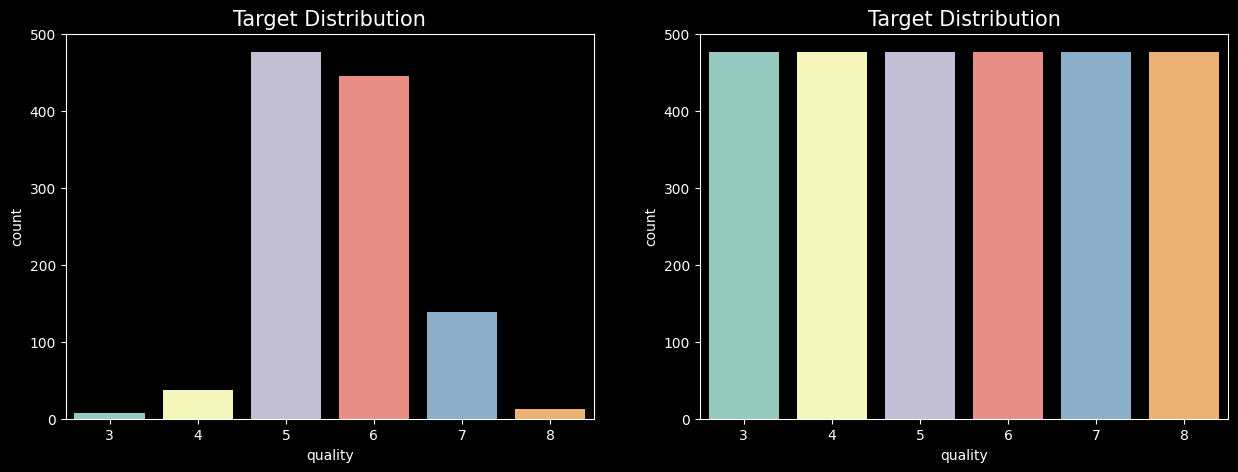

In [1324]:
#graficar la distribucion de los datos
fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.countplot(x=y_train,ax=ax[0]).set_title('Target Distribution',size=15)
sns.countplot(x=y_train_smote,ax=ax[1]).set_title('Target Distribution',size=15)


El mejor valor de k es: 1

Reporte de clasificación:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.10      0.06      0.08        16
           5       0.66      0.67      0.67       204
           6       0.55      0.53      0.54       192
           7       0.46      0.52      0.48        60
           8       0.00      0.00      0.00         5

    accuracy                           0.56       480
   macro avg       0.29      0.30      0.29       480
weighted avg       0.56      0.56      0.56       480

Precisión de K-NN en el conjunto de entrenamiento: 1.00
Precisión de K-NN en el conjunto de prueba: 0.56
accuracy_score: 0.56


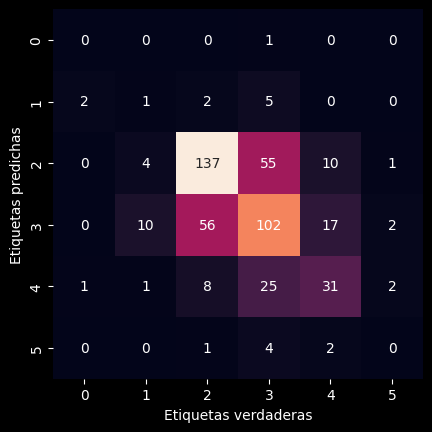

In [1325]:
k_values = list(range(1, 100))  
cv_scores = []


for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='f1_macro')  # Puedes cambiar la métrica si deseas
    cv_scores.append(scores.mean())
    
best_k = k_values[cv_scores.index(max(cv_scores))]
print("El mejor valor de k es:", best_k)

best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)
y_pred = best_knn.predict(X_test)

from sklearn.metrics import confusion_matrix, classification_report
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))
print('Precisión de K-NN en el conjunto de entrenamiento: {:.2f}'.format(best_knn.score(X_train, y_train)))
print('Precisión de K-NN en el conjunto de prueba: {:.2f}'.format(best_knn.score(X_test, y_test)))
print('accuracy_score: {:.2f}'.format(accuracy_score(y_test, y_pred)))

mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Etiquetas verdaderas')
plt.ylabel('Etiquetas predichas');


Reporte de clasificación para Naive Bayes:
              precision    recall  f1-score   support

           3       0.07      0.33      0.11         3
           4       0.40      0.12      0.19        16
           5       0.69      0.71      0.70       204
           6       0.57      0.51      0.54       192
           7       0.39      0.48      0.43        60
           8       0.20      0.20      0.20         5

    accuracy                           0.57       480
   macro avg       0.39      0.39      0.36       480
weighted avg       0.59      0.57      0.58       480

Precisión de Naive Bayes en el conjunto de entrenamiento: 0.56
Precisión de Naive Bayes en el conjunto de prueba: 0.57
accuracy_score: 0.57


Text(113.9222222222222, 0.5, 'Etiquetas predichas')

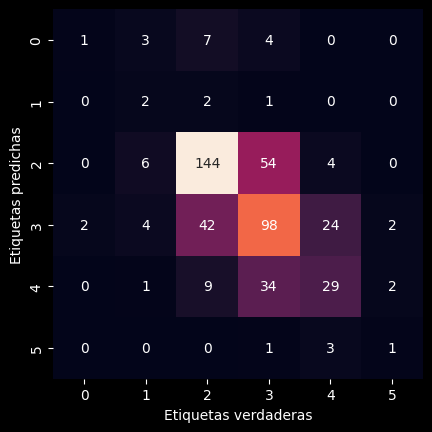

In [1326]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
y_pred_nb = nb_classifier.predict(X_test)

print("\nReporte de clasificación para Naive Bayes:")
print(classification_report(y_test, y_pred_nb))
print('Precisión de Naive Bayes en el conjunto de entrenamiento: {:.2f}'.format(nb_classifier.score(X_train, y_train)))
print('Precisión de Naive Bayes en el conjunto de prueba: {:.2f}'.format(nb_classifier.score(X_test, y_test)))
print('accuracy_score: {:.2f}'.format(accuracy_score(y_test, y_pred_nb)))

mat_nb = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(mat_nb.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Etiquetas verdaderas')
plt.ylabel('Etiquetas predichas')


Reporte de clasificación para Regresión Logística:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        16
           5       0.67      0.75      0.71       204
           6       0.55      0.62      0.58       192
           7       0.52      0.28      0.37        60
           8       0.00      0.00      0.00         5

    accuracy                           0.60       480
   macro avg       0.29      0.28      0.28       480
weighted avg       0.57      0.60      0.58       480

Precisión de Regresión Logística en el conjunto de entrenamiento: 0.59
Precisión de Regresión Logística en el conjunto de prueba: 0.60


c:\Users\Joako\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Joako\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Joako\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

Text(113.9222222222222, 0.5, 'Etiquetas predichas')

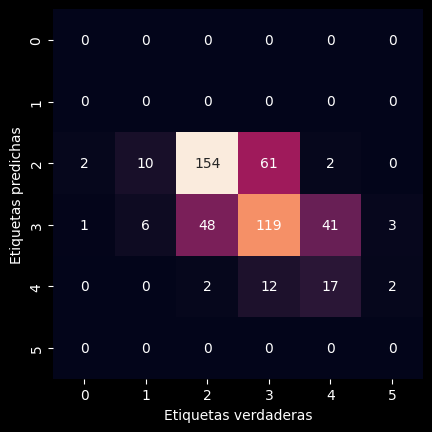

In [1327]:
logreg_classifier = LogisticRegression(max_iter=1000, solver="newton-cg")
logreg_classifier.fit(X_train, y_train)
y_pred_logreg = logreg_classifier.predict(X_test)

print("\nReporte de clasificación para Regresión Logística:")
print(classification_report(y_test, y_pred_logreg))
print('Precisión de Regresión Logística en el conjunto de entrenamiento: {:.2f}'.format(logreg_classifier.score(X_train, y_train)))
print('Precisión de Regresión Logística en el conjunto de prueba: {:.2f}'.format(logreg_classifier.score(X_test, y_test)))

mat_logreg = confusion_matrix(y_test, y_pred_logreg)
sns.heatmap(mat_logreg.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Etiquetas verdaderas')
plt.ylabel('Etiquetas predichas')

### Para datos SMOTE

El mejor valor de k es: 1

Reporte de clasificación:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.05      0.12      0.07        16
           5       0.76      0.61      0.68       204
           6       0.57      0.43      0.49       192
           7       0.39      0.52      0.45        60
           8       0.00      0.00      0.00         5

    accuracy                           0.50       480
   macro avg       0.30      0.28      0.28       480
weighted avg       0.60      0.50      0.54       480

Precisión de K-NN en el conjunto de entrenamiento: 1.00
Precisión de K-NN en el conjunto de prueba: 0.50


Text(113.9222222222222, 0.5, 'Etiquetas predichas')

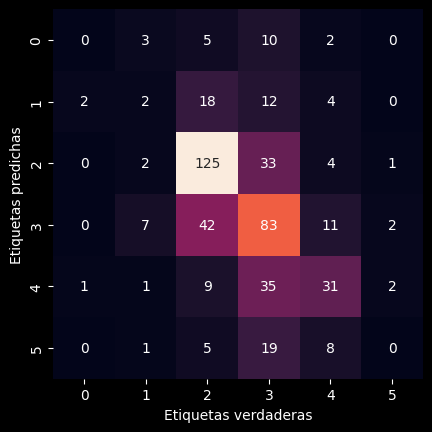

In [1328]:
#knn para oversampling
k_values = list(range(1, 100))
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_smote, y_train_smote, cv=5, scoring='f1_macro')  # Puedes cambiar la métrica si deseas
    cv_scores.append(scores.mean())
    
best_k = k_values[cv_scores.index(max(cv_scores))]
print("El mejor valor de k es:", best_k)

best_knn_smote = KNeighborsClassifier(n_neighbors=best_k)
best_knn_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = best_knn_smote.predict(X_test)


from sklearn.metrics import confusion_matrix, classification_report
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_smote))
print('Precisión de K-NN en el conjunto de entrenamiento: {:.2f}'.format(best_knn_smote.score(X_train_smote, y_train_smote)))
print('Precisión de K-NN en el conjunto de prueba: {:.2f}'.format(best_knn_smote.score(X_test, y_test)))

#graficar matriz de confusion con seaborn
mat_smote = confusion_matrix(y_test, y_pred_smote)
sns.heatmap(mat_smote.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Etiquetas verdaderas')
plt.ylabel('Etiquetas predichas')


Reporte de clasificación para Naive Bayes:
              precision    recall  f1-score   support

           3       0.03      0.33      0.05         3
           4       0.05      0.31      0.08        16
           5       0.72      0.39      0.51       204
           6       0.63      0.26      0.37       192
           7       0.28      0.40      0.33        60
           8       0.05      0.60      0.10         5

    accuracy                           0.34       480
   macro avg       0.29      0.38      0.24       480
weighted avg       0.60      0.34      0.41       480

Precisión de Naive Bayes en el conjunto de entrenamiento: 0.54
Precisión de Naive Bayes en el conjunto de prueba: 0.34


Text(113.9222222222222, 0.5, 'Etiquetas predichas')

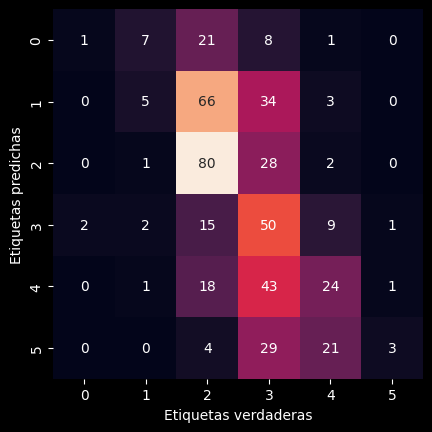

In [1329]:
#Naive Bayes para oversampling
nb_classifier_smote = GaussianNB()
nb_classifier_smote.fit(X_train_smote, y_train_smote)
y_pred_nb_smote = nb_classifier_smote.predict(X_test)

print("\nReporte de clasificación para Naive Bayes:")
print(classification_report(y_test, y_pred_nb_smote))
print('Precisión de Naive Bayes en el conjunto de entrenamiento: {:.2f}'.format(nb_classifier_smote.score(X_train_smote, y_train_smote)))
print('Precisión de Naive Bayes en el conjunto de prueba: {:.2f}'.format(nb_classifier_smote.score(X_test, y_test)))

mat_nb_smote = confusion_matrix(y_test, y_pred_nb_smote)
sns.heatmap(mat_nb_smote.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Etiquetas verdaderas')
plt.ylabel('Etiquetas predichas')


Reporte de clasificación para Regresión Logística:
              precision    recall  f1-score   support

           3       0.03      0.33      0.06         3
           4       0.07      0.38      0.12        16
           5       0.69      0.48      0.56       204
           6       0.57      0.27      0.37       192
           7       0.29      0.42      0.34        60
           8       0.08      0.80      0.14         5

    accuracy                           0.39       480
   macro avg       0.29      0.45      0.27       480
weighted avg       0.56      0.39      0.44       480

Precisión de Regresión Logística en el conjunto de entrenamiento: 0.64
Precisión de Regresión Logística en el conjunto de prueba: 0.39


Text(113.9222222222222, 0.5, 'Etiquetas predichas')

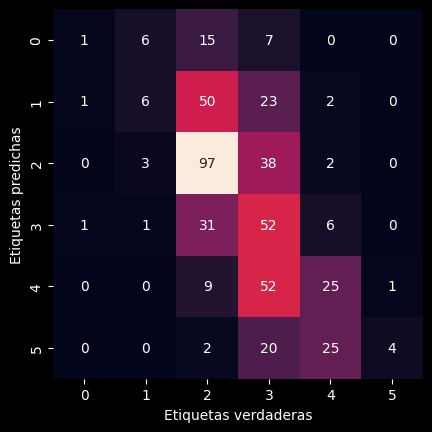

In [1330]:
#Regresion logistica para oversampling
logreg_classifier_smote = LogisticRegression(max_iter=1000, solver="newton-cg")
logreg_classifier_smote.fit(X_train_smote, y_train_smote)
y_pred_logreg_smote = logreg_classifier_smote.predict(X_test)

print("\nReporte de clasificación para Regresión Logística:")
print(classification_report(y_test, y_pred_logreg_smote))
print('Precisión de Regresión Logística en el conjunto de entrenamiento: {:.2f}'.format(logreg_classifier_smote.score(X_train_smote, y_train_smote)))
print('Precisión de Regresión Logística en el conjunto de prueba: {:.2f}'.format(logreg_classifier_smote.score(X_test, y_test)))

mat_logreg_smote = confusion_matrix(y_test, y_pred_logreg_smote)
sns.heatmap(mat_logreg_smote.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Etiquetas verdaderas')
plt.ylabel('Etiquetas predichas')

### Separar en buena y mala calidad

In [1331]:
#convertir la calidad 3, 4 y 5 en 0 (bad quality) y 6, 7 y 8 en 1 (good quality)
df['quality'] = df['quality'].replace([1,2,3,4,5],0)
df['quality'] = df['quality'].replace([6,7,8,9],1)

In [1332]:
df['quality'].value_counts()

quality
1    855
0    744
Name: count, dtype: int64

In [1333]:
y = df['quality']

In [1334]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

#Oversampling y datos de testeo y entrenamiento con SMOTE
smote = SMOTE(random_state=0)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

Text(0.5, 1.0, 'Target Distribution')

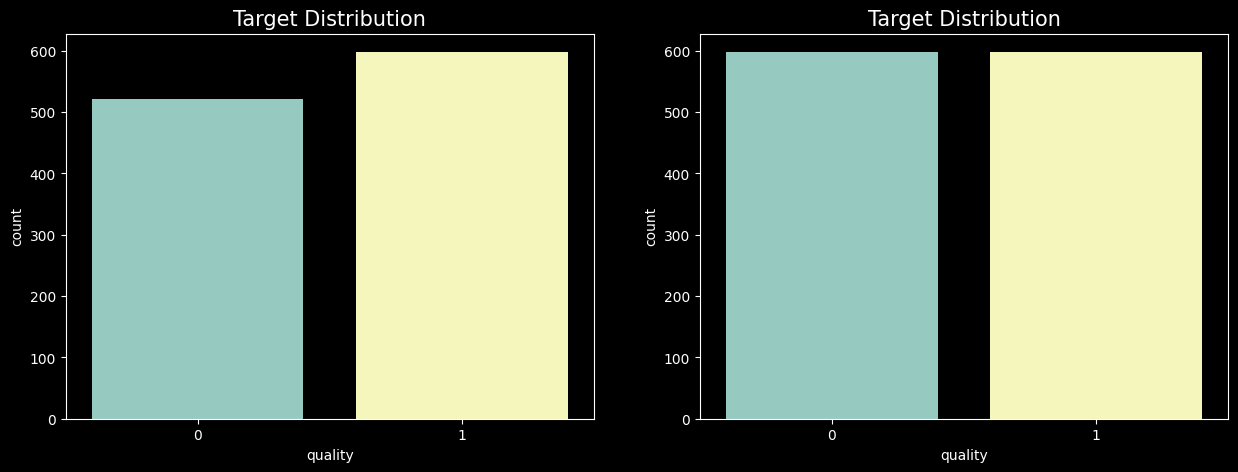

In [1335]:
#graficar la distribucion de los datos
fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.countplot(x=y_train,ax=ax[0]).set_title('Target Distribution',size=15)
sns.countplot(x=y_train_smote,ax=ax[1]).set_title('Target Distribution',size=15)

### Aplicar modelos para datos no balanceados

El mejor valor de k es: 30

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.59      0.58      0.59       223
           1       0.64      0.65      0.65       257

    accuracy                           0.62       480
   macro avg       0.62      0.62      0.62       480
weighted avg       0.62      0.62      0.62       480

Precisión de K-NN en el conjunto de entrenamiento: 0.69
Precisión de K-NN en el conjunto de prueba: 0.62
accuracy_score: 0.62


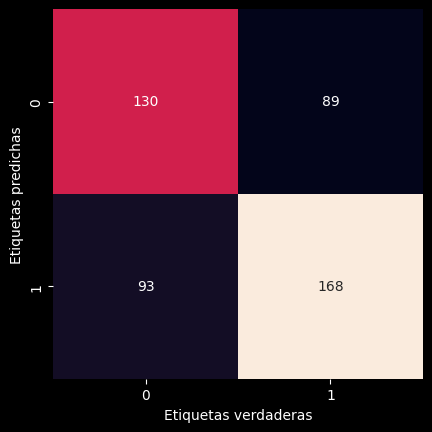

In [1336]:
k_values = list(range(1, 100))  
cv_scores = []


for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='f1_macro')  # Puedes cambiar la métrica si deseas
    cv_scores.append(scores.mean())
    
best_k = k_values[cv_scores.index(max(cv_scores))]
print("El mejor valor de k es:", best_k)

best_knn_bin = KNeighborsClassifier(n_neighbors=best_k)
best_knn_bin.fit(X_train, y_train)
y_pred_bin = best_knn_bin.predict(X_test)

from sklearn.metrics import confusion_matrix, classification_report
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_bin))
print('Precisión de K-NN en el conjunto de entrenamiento: {:.2f}'.format(best_knn_bin.score(X_train, y_train)))
print('Precisión de K-NN en el conjunto de prueba: {:.2f}'.format(best_knn_bin.score(X_test, y_test)))
print('accuracy_score: {:.2f}'.format(accuracy_score(y_test, y_pred_bin)))

mat = confusion_matrix(y_test, y_pred_bin)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Etiquetas verdaderas')
plt.ylabel('Etiquetas predichas');


Reporte de clasificación para Naive Bayes:
              precision    recall  f1-score   support

           0       0.69      0.80      0.74       223
           1       0.80      0.69      0.74       257

    accuracy                           0.74       480
   macro avg       0.75      0.75      0.74       480
weighted avg       0.75      0.74      0.74       480

Precisión de Naive Bayes en el conjunto de entrenamiento: 0.73
Precisión de Naive Bayes en el conjunto de prueba: 0.74


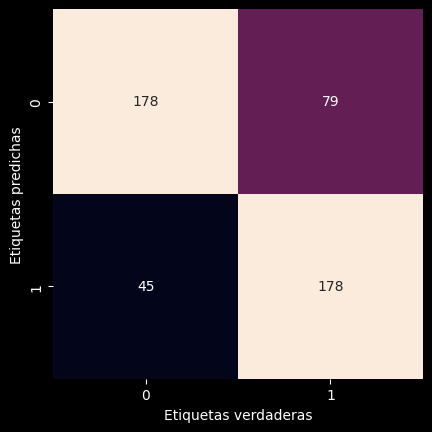

In [1337]:
#Naive Bayes
nb_classifier_bin = GaussianNB()
nb_classifier_bin.fit(X_train, y_train)
y_pred_nb_bin = nb_classifier_bin.predict(X_test)

print("\nReporte de clasificación para Naive Bayes:")
print(classification_report(y_test, y_pred_nb_bin))
print('Precisión de Naive Bayes en el conjunto de entrenamiento: {:.2f}'.format(nb_classifier_bin.score(X_train, y_train)))
print('Precisión de Naive Bayes en el conjunto de prueba: {:.2f}'.format(nb_classifier_bin.score(X_test, y_test)))
mat_nb_bin = confusion_matrix(y_test, y_pred_nb_bin)
sns.heatmap(mat_nb_bin.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Etiquetas verdaderas')
plt.ylabel('Etiquetas predichas');


Reporte de clasificación para Regresión Logística:
              precision    recall  f1-score   support

           0       0.74      0.76      0.75       223
           1       0.79      0.77      0.78       257

    accuracy                           0.77       480
   macro avg       0.77      0.77      0.77       480
weighted avg       0.77      0.77      0.77       480

Precisión de Regresión Logística en el conjunto de entrenamiento: 0.74
Precisión de Regresión Logística en el conjunto de prueba: 0.77


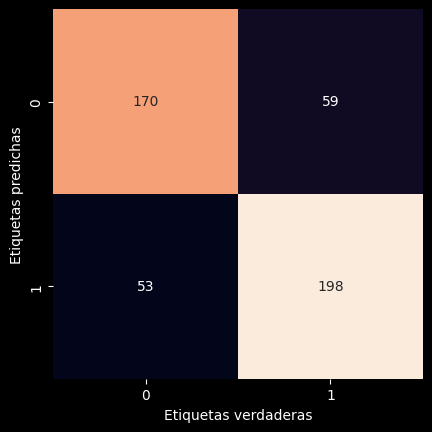

In [1338]:
#Regresion logistica
logreg_classifier_bin = LogisticRegression(max_iter=1000, solver="newton-cg")
logreg_classifier_bin.fit(X_train, y_train)
y_pred_logreg_bin = logreg_classifier_bin.predict(X_test)

print("\nReporte de clasificación para Regresión Logística:")
print(classification_report(y_test, y_pred_logreg_bin))
print('Precisión de Regresión Logística en el conjunto de entrenamiento: {:.2f}'.format(logreg_classifier_bin.score(X_train, y_train)))
print('Precisión de Regresión Logística en el conjunto de prueba: {:.2f}'.format(logreg_classifier_bin.score(X_test, y_test)))

mat_logreg_bin = confusion_matrix(y_test, y_pred_logreg_bin)
sns.heatmap(mat_logreg_bin.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Etiquetas verdaderas')
plt.ylabel('Etiquetas predichas');

### Para datos balanceados

In [1339]:
#knn para oversampling
k_values = list(range(1, 100))
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_smote, y_train_smote, cv=10, scoring='f1_macro')  # Puedes cambiar la métrica si deseas
    cv_scores.append(scores.mean())
    
best_k = k_values[cv_scores.index(max(cv_scores))]
print("El mejor valor de k es:", best_k)

best_knn_smote_bin = KNeighborsClassifier(n_neighbors=best_k)
best_knn_smote_bin.fit(X_train_smote, y_train_smote)
y_pred_smote_bin = best_knn_smote_bin.predict(X_test)

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_smote_bin))
print('Precisión de K-NN en el conjunto de entrenamiento: {:.2f}'.format(best_knn_smote_bin.score(X_train_smote, y_train_smote)))
print('Precisión de K-NN en el conjunto de prueba: {:.2f}'.format(best_knn_smote_bin.score(X_test, y_test)))



El mejor valor de k es: 1

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.72      0.70      0.71       223
           1       0.75      0.76      0.75       257

    accuracy                           0.73       480
   macro avg       0.73      0.73      0.73       480
weighted avg       0.73      0.73      0.73       480

Precisión de K-NN en el conjunto de entrenamiento: 1.00
Precisión de K-NN en el conjunto de prueba: 0.73



Reporte de clasificación para Naive Bayes:
              precision    recall  f1-score   support

           0       0.69      0.81      0.74       223
           1       0.81      0.68      0.74       257

    accuracy                           0.74       480
   macro avg       0.75      0.75      0.74       480
weighted avg       0.75      0.74      0.74       480

Precisión de Naive Bayes en el conjunto de entrenamiento: 0.74
Precisión de Naive Bayes en el conjunto de prueba: 0.74


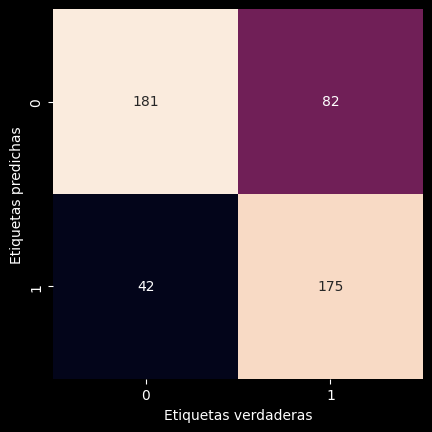

In [1340]:
#Naive Bayes para oversampling
nb_classifier_smote_bin = GaussianNB()
nb_classifier_smote_bin.fit(X_train_smote, y_train_smote)
y_pred_nb_smote_bin = nb_classifier_smote_bin.predict(X_test)

print("\nReporte de clasificación para Naive Bayes:")
print(classification_report(y_test, y_pred_nb_smote_bin))
print('Precisión de Naive Bayes en el conjunto de entrenamiento: {:.2f}'.format(nb_classifier_smote_bin.score(X_train_smote, y_train_smote)))
print('Precisión de Naive Bayes en el conjunto de prueba: {:.2f}'.format(nb_classifier_smote_bin.score(X_test, y_test)))

mat_nb_smote_bin = confusion_matrix(y_test, y_pred_nb_smote_bin)
sns.heatmap(mat_nb_smote_bin.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Etiquetas verdaderas')
plt.ylabel('Etiquetas predichas');



Reporte de clasificación para Regresión Logística:
              precision    recall  f1-score   support

           0       0.71      0.80      0.75       223
           1       0.81      0.72      0.76       257

    accuracy                           0.76       480
   macro avg       0.76      0.76      0.76       480
weighted avg       0.76      0.76      0.76       480

Precisión de Regresión Logística en el conjunto de entrenamiento: 0.75
Precisión de Regresión Logística en el conjunto de prueba: 0.76


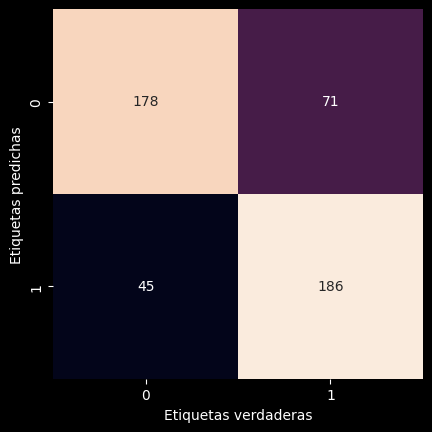

In [1341]:
#Regresion logistica para oversampling
logreg_classifier_smote_bin = LogisticRegression(solver="newton-cg")
logreg_classifier_smote_bin.fit(X_train_smote, y_train_smote)
y_pred_logreg_smote_bin = logreg_classifier_smote_bin.predict(X_test)

print("\nReporte de clasificación para Regresión Logística:")
print(classification_report(y_test, y_pred_logreg_smote_bin))
print('Precisión de Regresión Logística en el conjunto de entrenamiento: {:.2f}'.format(logreg_classifier_smote_bin.score(X_train_smote, y_train_smote)))
print('Precisión de Regresión Logística en el conjunto de prueba: {:.2f}'.format(logreg_classifier_smote_bin.score(X_test, y_test)))

mat_logreg_smote_bin = confusion_matrix(y_test, y_pred_logreg_smote_bin)
sns.heatmap(mat_logreg_smote_bin.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Etiquetas verdaderas')
plt.ylabel('Etiquetas predichas');

In [1342]:
from itertools import combinations

variables = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
             'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

best_accuracy = 0.0
best_feature_subset = []

for r in range(1, min(len(variables), 9) + 1):
    feature_combinations = combinations(variables, r)
    
    for subset in feature_combinations:
        X_train_subset = X_train[list(subset)]
        X_test_subset = X_test[list(subset)]
        
        logreg_classifier = LogisticRegression(max_iter=1000, solver="newton-cg")
        logreg_classifier.fit(X_train_subset, y_train)
        
        # Evaluar la precisión en el conjunto de prueba
        accuracy = logreg_classifier.score(X_test_subset, y_test)
        
        # Guardar la combinación si tiene mejor precisión
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_feature_subset = subset



In [1343]:
print(f"La mejor combinación de variables es: {best_feature_subset}")
print(f"Precisión correspondiente: {best_accuracy:.2f}")

La mejor combinación de variables es: ('volatile acidity', 'citric acid', 'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide', 'sulphates', 'alcohol')
Precisión correspondiente: 0.78
